# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
www.dreamintelligent.com 


# 1-4 Stacks
Stack is a type of sequence which, similar to a stack of papers, only supports insertion and deletion from its end. It is also called First In Last Out or FILO. An example of the use of stack is the Ctrl+Tab functionality in operating systems. 

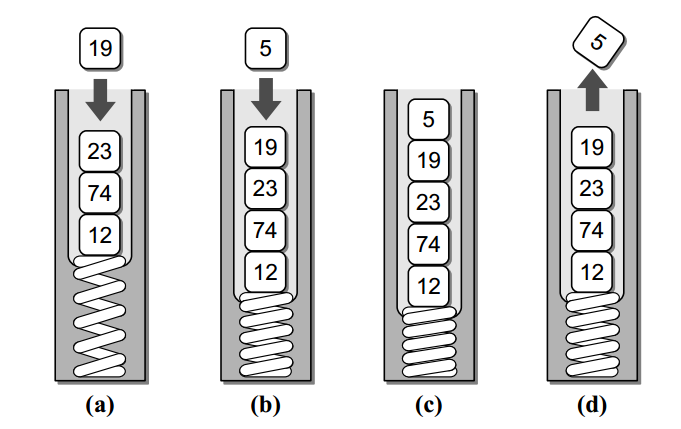

Because stack is a type of sequence, it can be easily implemented using either dynamic array or linked list. The only point is that in a `stack`, `insert_last` and `delete_last` are usually called `push` and `pop`.

## Implementing the Stack using an array

In [1]:
# Implementation of the Stack ADT using dymanic arrays.
from Array import Dynamic_Array
class Stack :
    # Creates an empty stack.
    def __init__( self ):
        self._theItems = Dynamic_Array
    
    # Returns True if the stack is empty or False otherwise.
    def isEmpty( self ):
        return len( self ) == 0

    # Returns the number of items in the stack.
    def __len__ ( self ):
        return len( self._theItems )

    # Returns the top item on the stack without removing it.
    def peek( self ):
        assert not self.isEmpty(), "Cannot peek at an empty stack"
        return self._theItems[-1]

    # Removes and returns the top item on the stack.
    # Same as delete_last
    def pop( self ):  
        assert not self.isEmpty(), "Cannot pop from an empty stack"
        return self._theItems.delete_last()

    # Push an item onto the top of the stack.
    #same as insert_last
    def push( self, item ):
        self._theItems.insert_last( item )


## Implementing the stack using a linked list

In [1]:
# Implementation of the Stack ADT using a singly linked list.

# The private storage class for creating stack nodes.
class _StackNode :
    def __init__( self, item, link ) :
        self.item = item
        self.next = link


class Stack :
    # Creates an empty stack.
    def __init__( self ):
        self._top = None  #Plays the role of the head.
        self._size = 0 
    
    # Returns True if the stack is empty or False otherwise.
    def isEmpty( self ):
        return self._top is None

    # Returns the number of items in the stack.
    def __len__( self ):
        return self._size

    # Returns the top item on the stack without removing it.
    def peek( self ):
        assert not self.isEmpty(), "Cannot peek at an empty stack"
        return self._top.item

    # Removes and returns the top item on the stack.
    def pop( self ):
        assert not self.isEmpty(), "Cannot pop from an empty stack"
        node = self._top
        self._top = self._top.next
        self._size -= 1
        return node.item

    # Pushes an item onto the top of the stack.
    def push( self, item ) :
        self._top = _StackNode( item, self._top )
        self._size += 1



In [ ]:
#Simple application: getting numbers from the user until a negative number is enetered then printing them in reverse order
PROMPT = "Enter an int value (<0 to end):"
myStack = Stack()
value = int(input( PROMPT ))
while value >= 0 :
    myStack.push( value )
    value = int(input( PROMPT ))
    
while not myStack.isEmpty() :
    value = myStack.pop()
    print( value )

3
2
1


# Stack applications
## 1-balanced delimiters
When are the delimiters, i.e. ()[]{}, in an expression, or a piece of code balanced? 

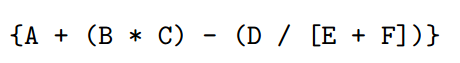
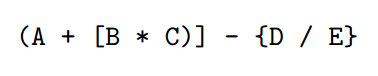
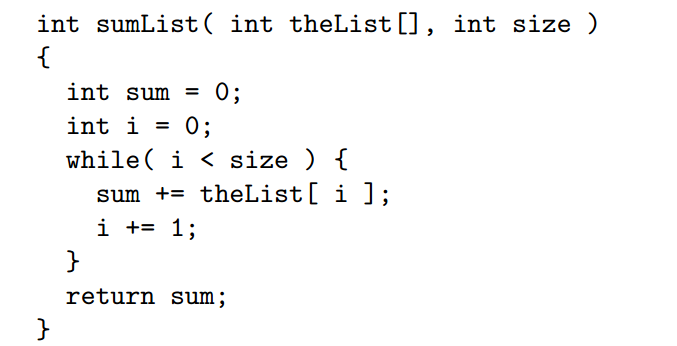

Consider the C++ code segment from earlier. As the file is scanned, we can
push each opening delimiter onto the stack. When a closing delimiter is encoun-
tered, we pop the opening delimiter from the stack and compare it to the closing
delimiter. For properly paired delimiters, the two should match.
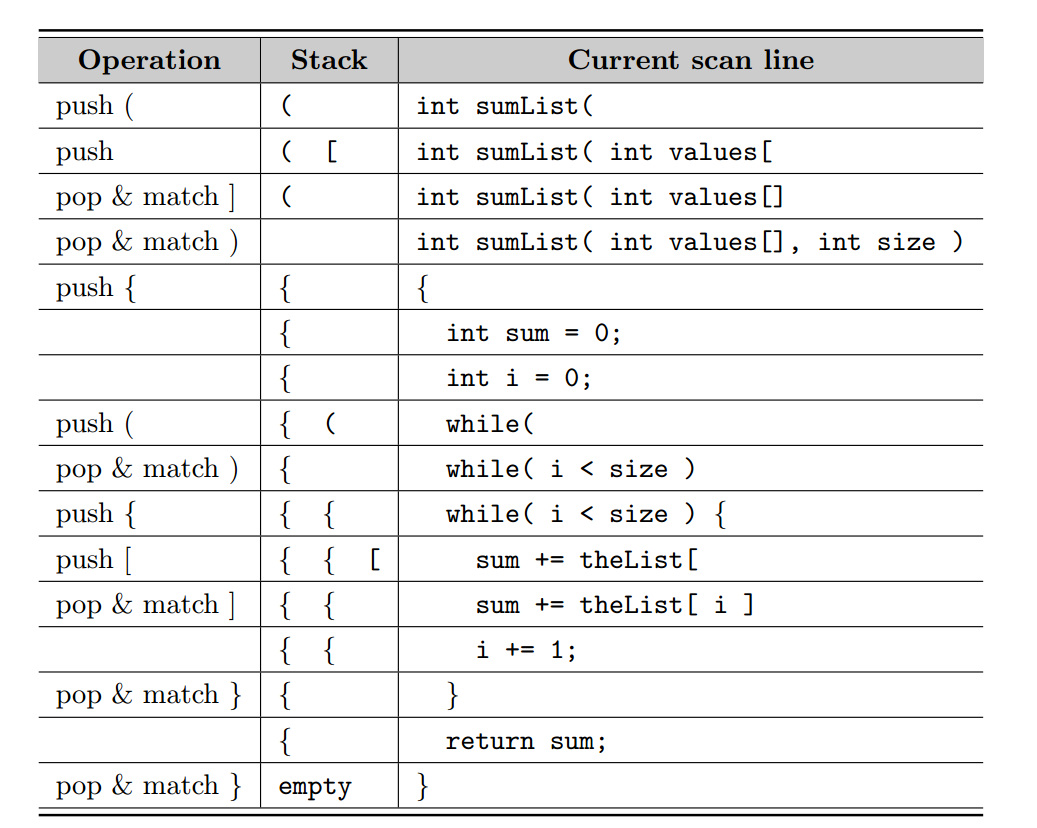

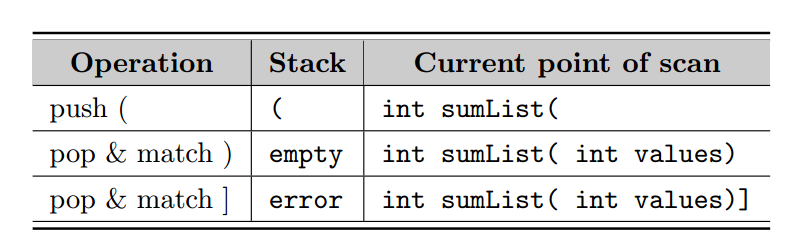

In [4]:
# Implementation of the algorithm for validating balanced brackets in
# a C++ source file.
def isValidSource( srcfile ):
    s = Stack()
    for line in srcfile :
        for token in line :
            if token in "{[(" :
                s.push( token )
            elif token in "}])" :
                if s.isEmpty() :
                    return False
                else :
                    left = s.pop()
                    if (token == "}" and left != "{") or \
                        (token == "]" and left != "[") or \
                        (token == ")" and left != "(") :
                        return False

    return s.isEmpty()


## 2-Evaluating postfix expressions

How to evaluate a mathematical expression like A * B + C / D

Mathematicsl expressions can be stored in computer momory in three different formats:
- Infix: A+B
- Prefix: +AB
- Postfix: AB+

In prefix and postfix, expressions are unique and produce a unique result. They also don't need parenthesis.

From infix to postfix:
A*(B+C) -> ABC+*  


Algorithm for converting infix to postfix.
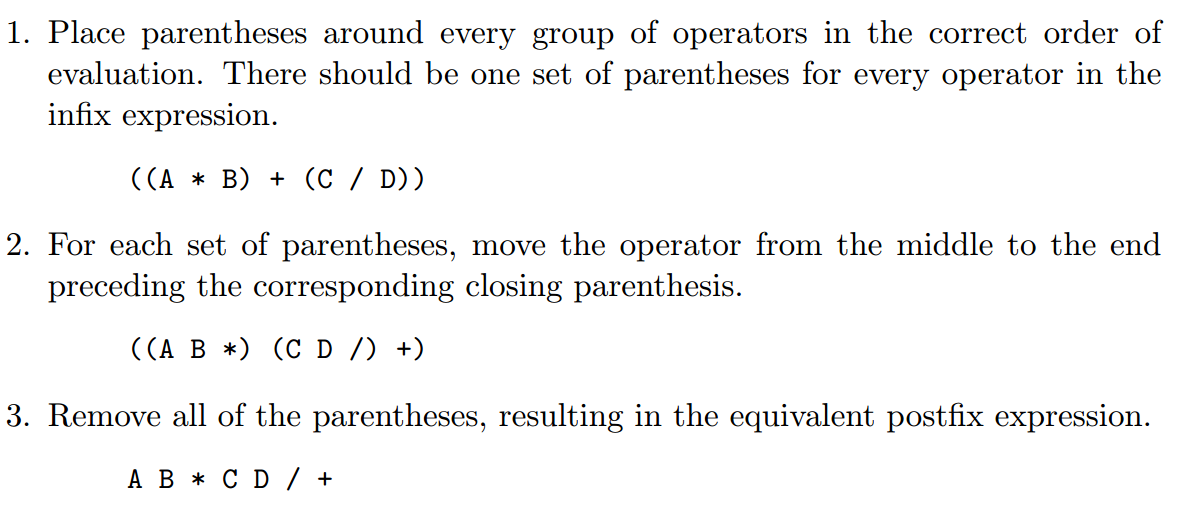



**How to evaluate a postfix expression using a stack:**
1. If the current item is an operand, push its value onto the stack.
2. If the current item is an operator:
    (a) Pop the top two operands off the stack.  
    (b) Perform the operation. (Note the top value is the right operand while the next to the top value is the left operand.)  
    (c) Push the result of this operation back onto the stack.


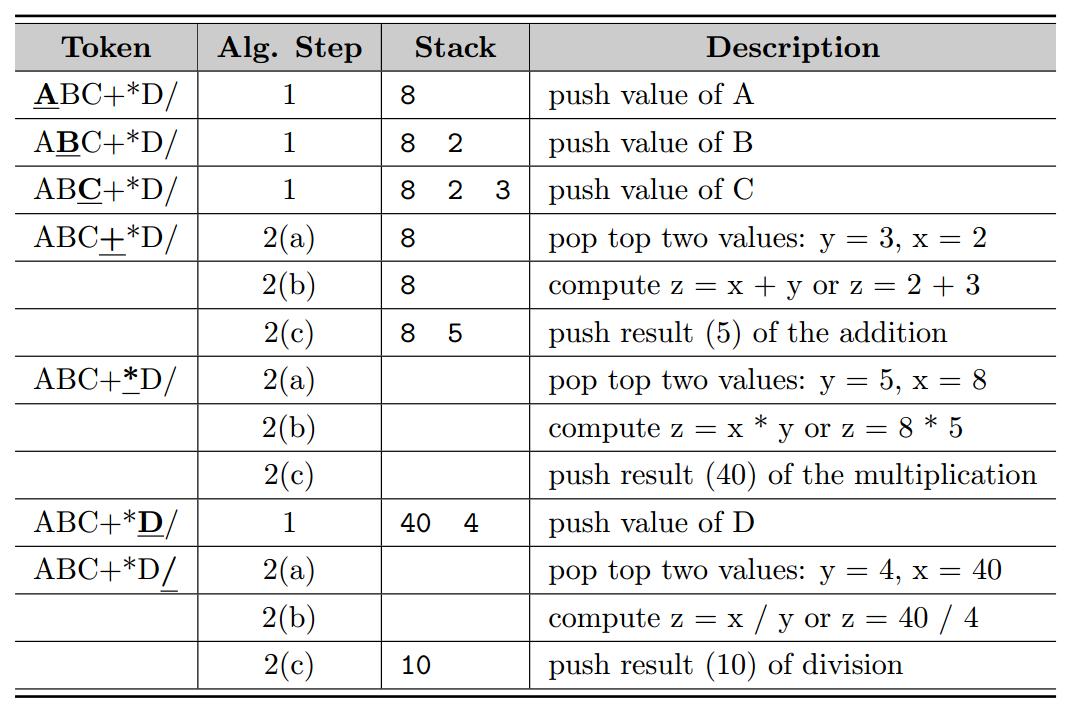

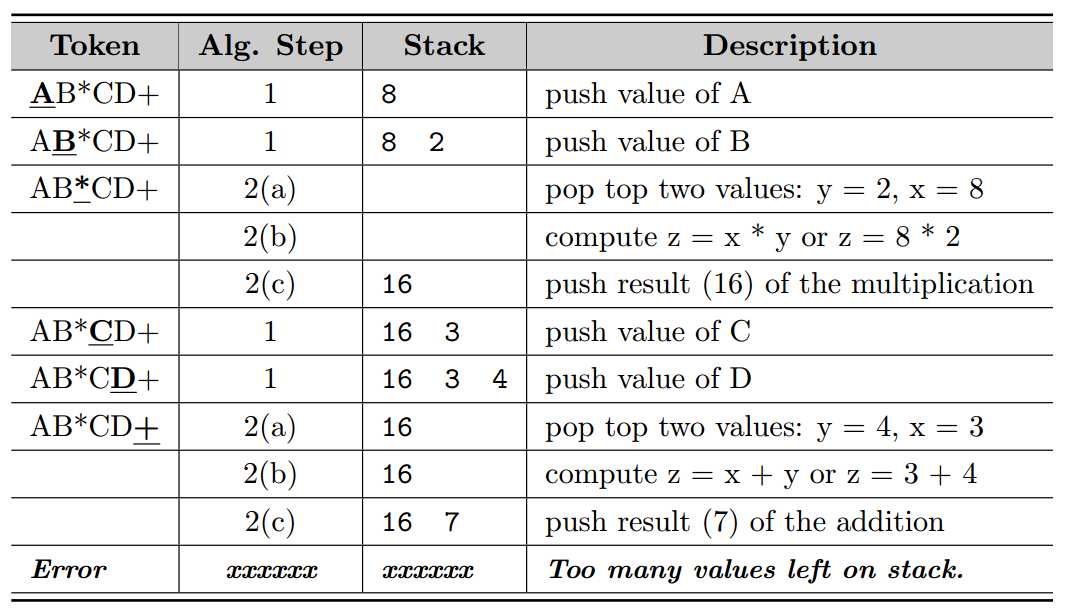

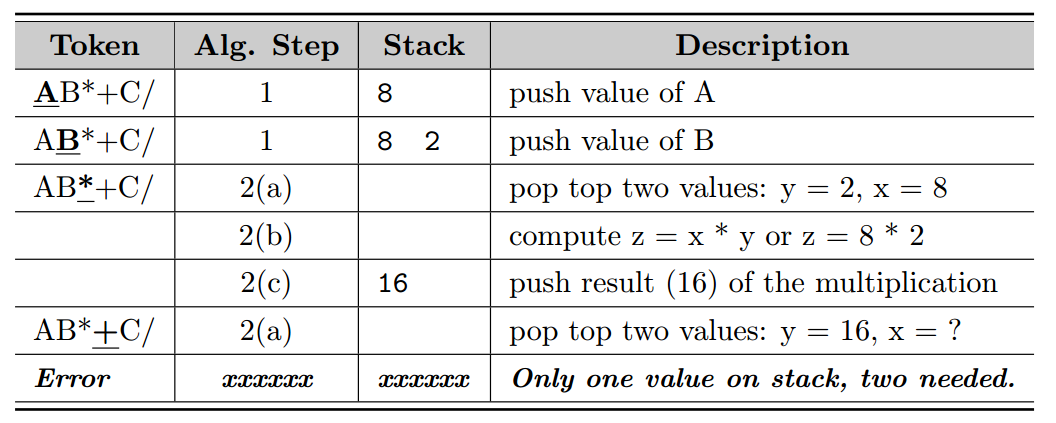

## 3-Solving a Maze
We have a maze as a 2-D grid and starting from the beginning we want to find our way to the end. 

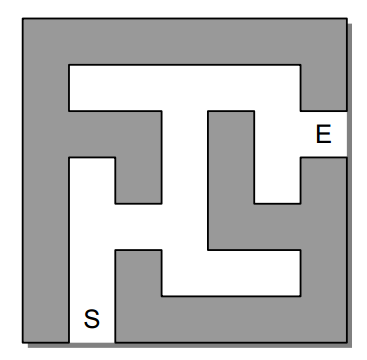

Brute force vs backtracking. In backtracking, whenever we reach a dead end, we trace our way back along the path till we reach a cell which allows a new move AND we mark the cells in this procedure as "tried" to avoid them in the future. 

An example of solving a maze using backtracking. 
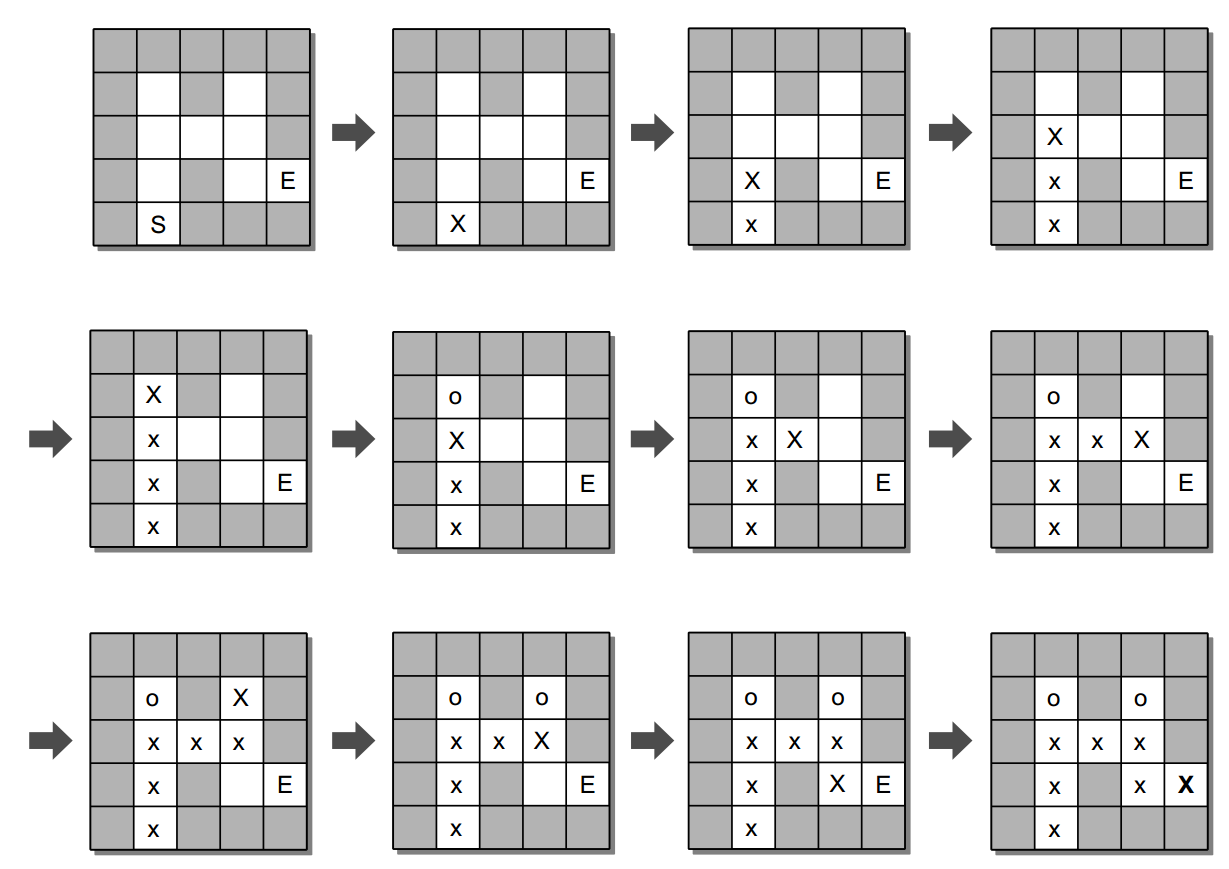

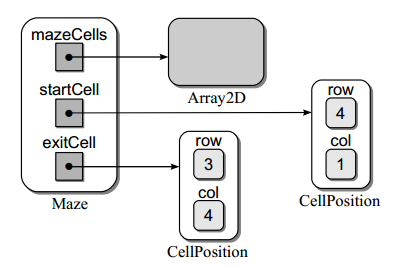

For solving the maze we need two main functions: 
- `valid_moves` which tells us what moves we can take at the current step. We must avoid wall cells, tried cells and path cells.
- `findPath` which either finds a path from the start to the end or returns that such a path does not exist.  

In [ ]:
# Implements the Maze ADT using a 2-D array.
from Array import Array2D


class Maze :
    # Define constants to represent contents of the maze cells.
    MAZE_WALL = "*"
    PATH_TOKEN = "x"
    TRIED_TOKEN = "o"

    # Creates a maze object with all cells marked as open.
    def __init__( self, numRows, numCols ):
        self._mazeCells = Array2D( numRows, numCols )
        self._startCell = None
        self._exitCell = None

    # Returns the number of rows in the maze.
    def numRows( self ):
        return self._mazeCells.numRows()

    # Returns the number of columns in the maze.
    def numCols( self ):
        return self._mazeCells.numCols()

    # Fills the indicated cell with a "wall" marker.
    def setWall( self, row, col ):
        assert row >= 0 and row < self.numRows() and \
        col >= 0 and col < self.numCols(), "Cell index out of range."
        
        self._mazeCells.set( row, col, self.MAZE_WALL )

    # Sets the starting cell position.
    def setStart( self, row, col ):
        assert row >= 0 and row < self.numRows() and \
        col >= 0 and col < self.numCols(), "Cell index out of range."
        self._startCell = _CellPosition( row, col )

    # Sets the exit cell position.
    def setExit( self, row, col ):
        assert row >= 0 and row < self.numRows() and \
        col >= 0 and col < self.numCols(), \
        "Cell index out of range."
        self._exitCell = _CellPosition( row, col )

    # Attempts to solve the maze by finding a path from the starting cell
    # to the exit. Returns True if a path is found and False otherwise.
    def findPath( self ):
        path=Stack()
        nopath=False
        
        path.push(self._startCell)
        current=self._startCell
        
        while not nopath:
            
            if current==self._exitCell:
                return True, path
            
            valid_steps=self.valid_moves(current)
            
            if len(valid_steps)==0: #current is a dead end
                self._markTried(current.row, current.col)
                
                #backtrack
                while len(path)>0: # len(valid_steps)==0:
                    path.pop() #Popping the current cell
                    back_step=path.peek()
                    valid_steps=self.valid_moves(back_step)
                    if len(valid_steps)>0:
                        
                        break
                    else: #back_step is a dead end
                        self._markTried(current.row, current.col)
                    
                if len(path)==0:
                    return False
                else:
                    current=back_step
            else: # we have choices for proceeding
                current=valid_steps[0]
                path.push(current)
                
        return not nopath    
            
            
            
            
       
    
        
    # takes a cell and returns all the valid moves which are not tries or in the path    
    def valid_moves(self, current):
        valid_steps=Dynamic_Array()
        for i in [-1,0,1]:
            for j in [-1,0,1]:

                #Not moving diagonally!
                if (i!=0 and j!=0) or (i==0 and j==0): 
                    continue
                 
                nbh_row, nbh_col=current.row+i, current.col+j
                if nbh_row<0 or nbh_col<0 or nbh_row>=self.numRows() or nbh_row>= self.num.Cols():
                    continue
                
                nbh_value=self._mazeCells[nbh_row,nbh_col] # What kind of cell is it: wall, tried, ,...?
                if  nbh_value not in [self.MAZE_WALL, self.PATH_TOKEN, self.TRIED_TOKEN]:
                    valid_steps.insert_last( _CellPosition(nbh_row, nbh_col) )
        return valid_steps            
        
    
    def reset( self ):
        return
    

    # Prints a text-based representation of the maze.
    def draw( self ):
        return

    # Returns True if the given cell position is a valid move.
    def _validMove( self, row, col ):
        return row >= 0 and row < self.numRows() \
        and col >= 0 and col < self.numCols() \
        and self._mazeCells[row, col] is None

    # Helper method to determine if the exit was found.
    def _exitFound( self, row, col ):
        return row == self._exitCell.row and \
        col == self._exitCell.col

    # Drops a "tried" token at the given cell.
    def _markTried( self, row, col ):
        self._mazeCells.set( row, col, self.TRIED_TOKEN )

    # Drops a "path" token at the given cell.
    def _markPath( self, row, col ):
        self._mazeCells.set( row, col, self.PATH_TOKEN )

# Private storage class for holding a cell position.
class _CellPosition( object ):
    def __init__( self, row, col ):
        self.row = row
        self.col = col


In [ ]:
# Program for building and solving a maze.
#from maze import Maze 
# The main routine.
def main():
    maze = buildMaze( "mazefile.txt" )
    if maze.findPath() :
        print( "Path found...." )
        maze.draw()
    else :
        print( "Path not found...." )

# Builds a maze based on a text format in the given file.
def buildMaze( filename ):
    infile = open( filename, "r" )

    # Read the size of the maze.
    nrows, ncols = readValuePair( infile )
    maze = Maze( nrows, ncols )

    # Read the starting and exit positions.
    row, col = readValuePair( infile )
    maze.setStart( row, col )
    row, col = readValuePair( infile )
    maze.setExit( row, col )

    # Read the maze itself.
    for row in range( nrows ) :
        line = infile.readline()
        for col in range( len(line) ) :
            if line[col] == "*" :
                maze.setWall( row, col )

    # Close the maze file and return the newly constructed maze.
    infile.close()
    return maze

# Extracts an integer value pair from the given input file.
def readValuePair( infile ):
    line = infile.readline()
    valA, valB = line.split()
    return int(valA), int(valB)

# Call the main routine to execute the program.
main()


## Exercises

1- Run the follwing piece of code "by hand" and write down the contents of the stack at each step of the loop. 

In [ ]:
values = Stack()
for i in range( 16 ) :
    if i % 3 == 0 :
        values.push( i )
    elif i % 4 == 0 :
        values.pop()


2- Here we consider an alternative solution to the maze problem which can find *all* the possible paths. It does not make used of the "tried" token used in the above algorithm.
Consider a linked list whose head corresponds to the start cell of the maze. 
Instead of having a single `next` pointer, each node has an array of up to four pointes which correspond to its `valid_moves`. If a cell does not have any valid moves, its pointer array will be empty and it is called a dead end. 

The current *leaves* of the linked list are nodes whose pointer array is not computed yet. They are kept in a dynamic array at each iteration.
Starting from the start cell as the head, at each iteration, the algorithm goes over all the leaves of the linked list and adds the valid moves of each to its (empty) pointer array. Each visited cell is marked as such so that no loop is created. 


The algorithm stops when all the leaves are either None/dead end or the exit cell.

Then starting from the leaves that are the exit, we can trace our way back to the beginning and form a path. 

This exercise is an example of using trees and Breath First Search which we will discuss in detail later in the course.